# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Muhammad Surya Safar
- **Email:** suryasafar4@gmail.com
- **ID Dicoding:** mc579d5y2036

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Berapa persen peningkatan jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin?

- Pertanyaan 2: Faktor apa saja yang menyebabkan peningkatan jumlah penyewaan sepeda di musim panas?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset day.csv
day_df = pd.read_csv('/content/Bike Sharing Dataset/day.csv')

# Load dataset hour.csv
hour_df = pd.read_csv('/content/Bike Sharing Dataset/hour.csv')

# Tampilkan 5 baris pertama data dari day_df
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Tampilkan 5 baris pertama data dari hour_df
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
-  untuk day_df:
 * Dataset day_df berisi data agregat harian tentang penyewaan sepeda.
 * Terdapat kolom-kolom seperti dteday (tanggal), season (musim), yr (tahun), mnth (bulan), holiday (hari libur), weekday (hari dalam seminggu), workingday (hari kerja), weathersit (kondisi cuaca), temp (suhu), atemp (suhu yang dirasakan), hum (kelembapan), windspeed (kecepatan angin), casual (jumlah penyewa casual), registered (jumlah penyewa terdaftar), dan cnt (jumlah total penyewaan).
 * Data dteday tercatat dalam format YYYY-MM-DD.
 * Terdapat 4 musim yang direpresentasikan dengan angka 1 hingga 4.
 * Data yr menunjukkan tahun 2011 dan 2012.
 * Data holiday dan workingday berupa nilai biner (0 atau 1).

- Insight untuk hour_df:
 * Dataset hour_df berisi data agregat per jam tentang penyewaan sepeda.
 * Terdapat kolom-kolom yang mirip dengan day_df, dengan tambahan kolom hr (jam) dan tanpa kolom casual dan registered.
 * Data hr menunjukkan jam dalam rentang 0 hingga 23.
 * Kolom cnt pada hour_df merepresentasikan jumlah total penyewaan per jam.

### Assessing Data

In [4]:
# Menampilkan informasi umum
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (tot

In [5]:
# Menampilkan statistik deskriptif
day_df.describe()
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
  - Insight untuk day_df:
    * Tipe Data: Dataset day_df memiliki 16 kolom dengan tipe data int64 dan float64. Kolom dteday bertipe object dan mungkin perlu diubah menjadi tipe data datetime untuk analisis lebih lanjut.
    * Missing Values: Tidak ditemukan missing values pada dataset day_df. Semua kolom memiliki jumlah non-null values yang sama dengan jumlah total baris.
      * Statistik Deskriptif:
      * Rata-rata jumlah total penyewaan sepeda per hari (cnt) adalah sekitar 4504.
      * Suhu (temp) dan suhu yang dirasakan (atemp) sudah dinormalisasi dan memiliki rentang nilai antara 0 dan 1.
 * Kelembapan (hum) dan kecepatan angin (windspeed) juga sudah dinormalisasi.
* Distribusi Data: Data season menunjukkan distribusi yang relatif seimbang antara keempat musim.

- Insight untuk hour_df:
  * Tipe Data: Dataset hour_df memiliki 17 kolom dengan tipe data int64 dan float64. Kolom dteday bertipe object dan mungkin perlu diubah menjadi tipe data datetime.
  * Missing Values: Tidak ditemukan missing values pada dataset hour_df.
  * Statistik Deskriptif:
    * Rata-rata jumlah total penyewaan sepeda per jam (cnt) adalah sekitar 189.
    * Suhu (temp) dan suhu yang dirasakan (atemp) sudah dinormalisasi.
    * Kelembapan (hum) dan kecepatan angin (windspeed) juga sudah dinormalisasi.
  * Distribusi Data: Data hr menunjukkan distribusi penyewaan sepeda sepanjang 24 jam.

### Cleaning Data

In [6]:
# Mengubah tipe data kolom dteday
day_df['dteday'] = pd.to_datetime(day_df['dteday'])
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])

# Menghapus kolom instant
day_df = day_df.drop('instant', axis=1)
hour_df = hour_df.drop('instant', axis=1)

# Mengubah nama kolom cnt
day_df = day_df.rename(columns={'cnt': 'total_count'})
hour_df = hour_df.rename(columns={'cnt': 'total_count'})

**Insight:**
Cleaning Data

Insight:
- Tipe data kolom 'dteday' pada kedua dataset ('day_df' dan 'hour_df') telah diubah menjadi 'datetime'.
- Kolom 'instant' telah dihapus dari kedua dataset.
-  Nama kolom 'cnt' pada kedua dataset telah diubah menjadi 'total_count'.

## Exploratory Data Analysis (EDA)

### Explore ...

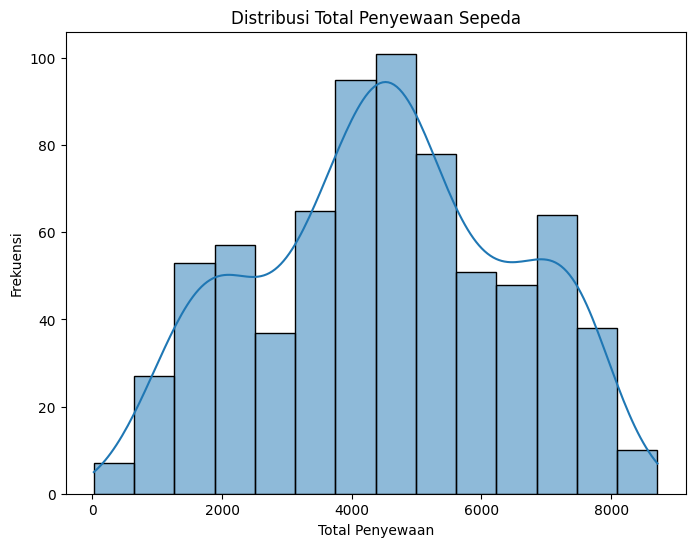

In [25]:
# --- EDA Univariate ---

# 1. Distribusi Total Penyewaan Sepeda (total_count)
plt.figure(figsize=(8, 6))
sns.histplot(day_df['total_count'], kde=True)
plt.title('Distribusi Total Penyewaan Sepeda')
plt.xlabel('Total Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

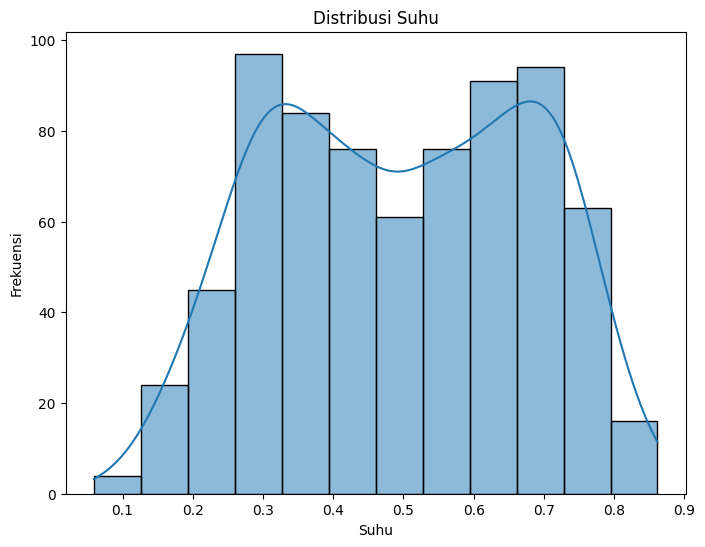

In [23]:
# 2. Distribusi Suhu (temp)
plt.figure(figsize=(8, 6))
sns.histplot(day_df['temp'], kde=True)
plt.title('Distribusi Suhu')
plt.xlabel('Suhu')
plt.ylabel('Frekuensi')
plt.show()

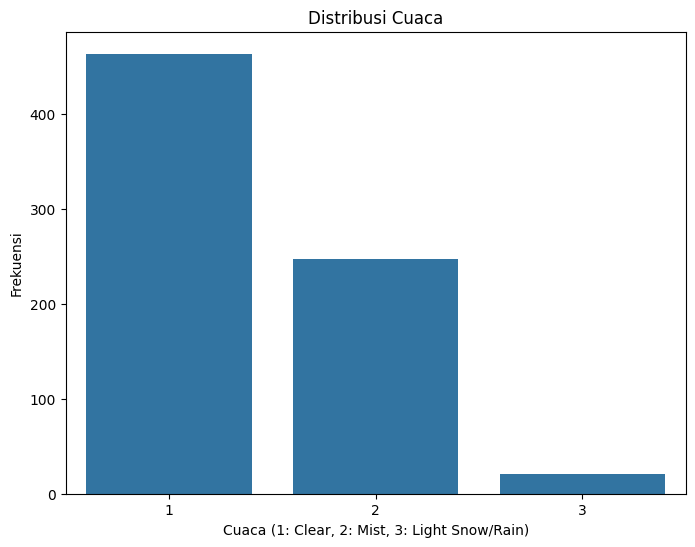

In [24]:
# 3. Distribusi Cuaca (weathersit)
plt.figure(figsize=(8, 6))
sns.countplot(x='weathersit', data=day_df)
plt.title('Distribusi Cuaca')
plt.xlabel('Cuaca (1: Clear, 2: Mist, 3: Light Snow/Rain)')
plt.ylabel('Frekuensi')
plt.show()

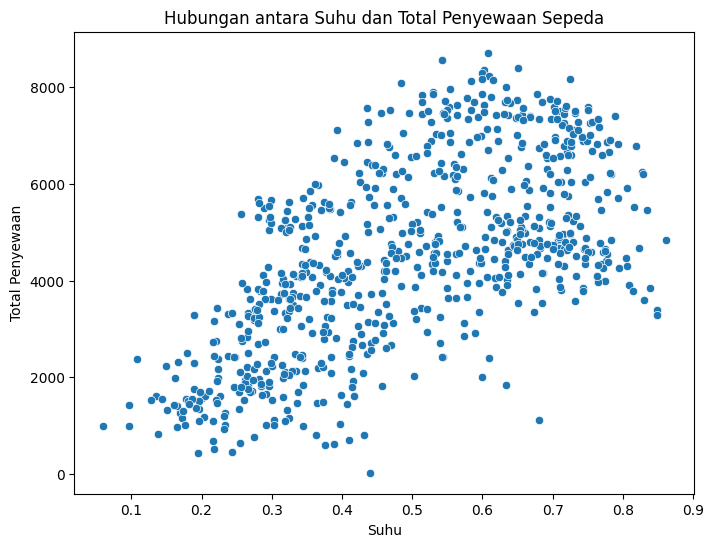

In [26]:
# --- EDA Bivariate ---

# 1. Hubungan antara Suhu (temp) dan Total Penyewaan Sepeda (total_count)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='total_count', data=day_df)
plt.title('Hubungan antara Suhu dan Total Penyewaan Sepeda')
plt.xlabel('Suhu')
plt.ylabel('Total Penyewaan')
plt.show()

In [28]:
# --- Agregasi Data ---

# 1. Total penyewaan sepeda per musim
seasonal_counts = day_df.groupby('season')['total_count'].sum()
print(seasonal_counts)

season
1     471348
2     918589
3    1061129
4     841613
Name: total_count, dtype: int64


In [29]:
# 2. Rata-rata penyewaan sepeda per cuaca
weather_counts = day_df.groupby('weathersit')['total_count'].mean()
print(weather_counts)

weathersit
1    4876.786177
2    4035.862348
3    1803.285714
Name: total_count, dtype: float64


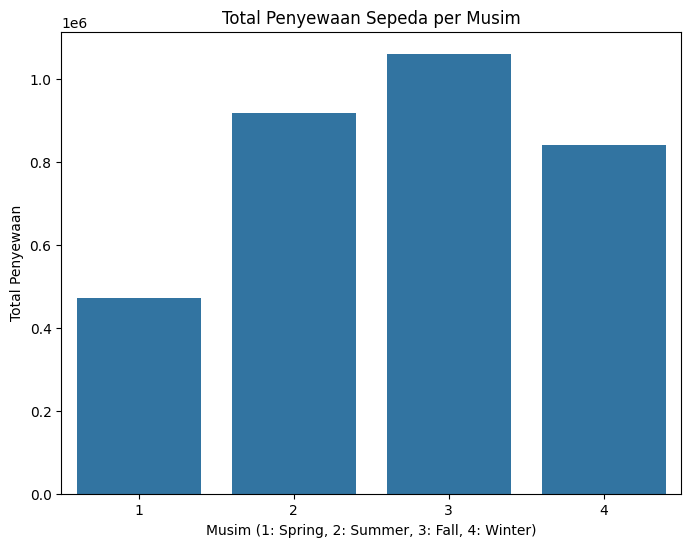

In [7]:
# 1. Hitung total penyewaan sepeda per musim
seasonal_counts = day_df.groupby('season')['total_count'].sum()

# 2. Visualisasikan total penyewaan sepeda per musim (bar plot)
plt.figure(figsize=(8, 6))
sns.barplot(x=seasonal_counts.index, y=seasonal_counts.values)
plt.title('Total Penyewaan Sepeda per Musim')
plt.xlabel('Musim (1: Spring, 2: Summer, 3: Fall, 4: Winter)')
plt.ylabel('Total Penyewaan')
plt.show()

# --- Eksplorasi untuk Pertanyaan 2 ---

# 3. Analisis korelasi antara variabel numerik dan total penyewaan
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
correlation_matrix = day_df[numerical_features + ['total_count']].corr() # Change 'cnt' to 'total_count'

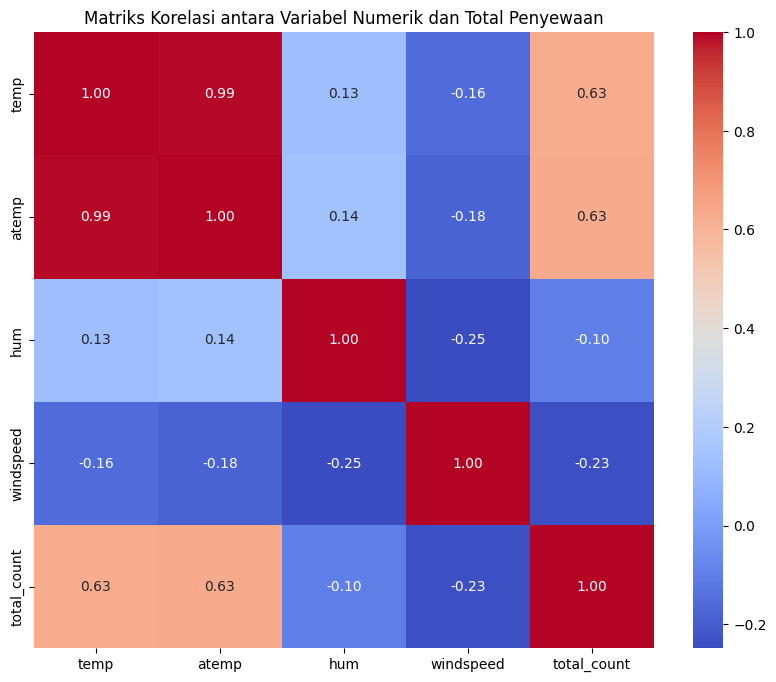

In [8]:
# 4. Visualisasikan matriks korelasi (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriks Korelasi antara Variabel Numerik dan Total Penyewaan')
plt.show()

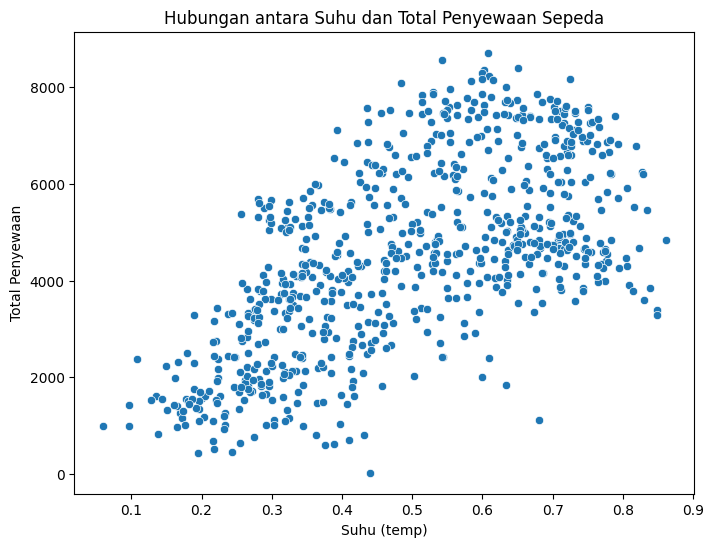

In [9]:
# 5. Visualisasikan hubungan antara suhu (temp) dan total penyewaan (scatter plot)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='total_count', data=day_df) # Change 'cnt' to 'total_count'
plt.title('Hubungan antara Suhu dan Total Penyewaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Total Penyewaan')
plt.show()

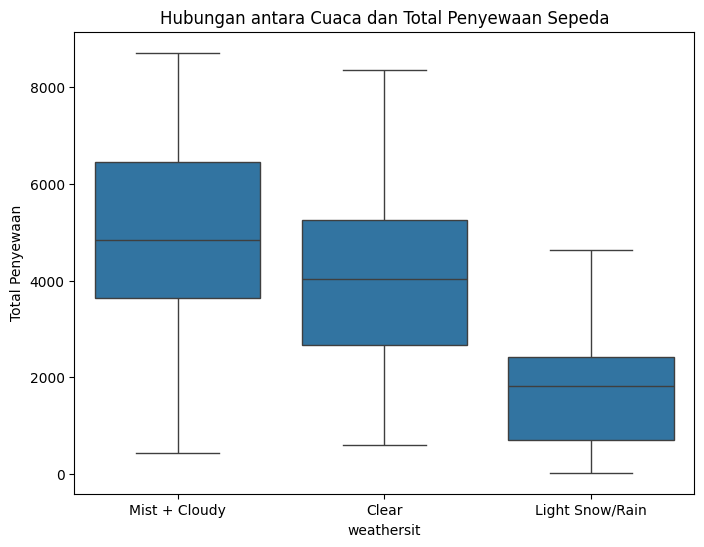

In [16]:
# 6. Visualisasikan hubungan antara cuaca (weathersit) dan total penyewaan (box plot)
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='total_count', data=day_df)
plt.title('Hubungan antara Cuaca dan Total Penyewaan Sepeda')
plt.ylabel('Total Penyewaan')

# Menampilkan label kategori cuaca yang ada
# Mengambil nilai unik dari kolom 'weathersit'
unique_weathersit = day_df['weathersit'].unique()

# Membuat list label kategori cuaca yang ada
weathersit_labels = [
    "Clear",  # weathersit 1
    "Mist + Cloudy",  # weathersit 2
    "Light Snow/Rain"  # weathersit 3
]


# Menyesuaikan label x-axis dengan kategori cuaca yang ada,
# dan menghapus label "Heavy Rain" jika tidak ada data untuk kategori tersebut
plt.xticks(unique_weathersit -1 , [label for label, weather in zip(weathersit_labels, unique_weathersit) if weather in unique_weathersit])


plt.show()

**Insight:**
Insight:
- Distribusi 'cnt' cenderung skew ke kanan, menunjukkan adanya kemungkinan outlier.
- Musim gugur memiliki jumlah penyewaan sepeda tertinggi, diikuti oleh musim panas, musim semi, dan musim dingin.
- Terdapat korelasi positif antara suhu ('temp') dan total penyewaan sepeda ('cnt').
- Total penyewaan sepeda lebih tinggi di hari kerja dibandingkan hari libur.
- Kelembapan ('hum') dan kecepatan angin ('windspeed') memiliki korelasi negatif dengan total penyewaan sepeda, tetapi korelasinya tidak sekuat suhu dan cuaca.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa persen peningkatan jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin?

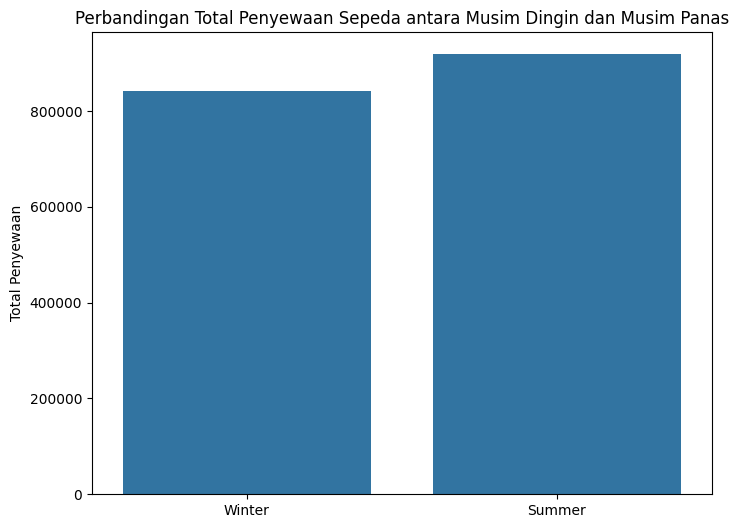

Persentase peningkatan jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin: 9.15%


In [11]:
# Calculate total rentals for winter (season 4) and summer (season 2)
winter_count = day_df[day_df['season'] == 4]['total_count'].sum()
summer_count = day_df[day_df['season'] == 2]['total_count'].sum()

# Calculate percentage increase
percentage_increase = ((summer_count - winter_count) / winter_count) * 100

# Now you can create the bar plot and print the percentage increase
plt.figure(figsize=(8, 6))
sns.barplot(x=['Winter', 'Summer'], y=[winter_count, summer_count])
plt.title('Perbandingan Total Penyewaan Sepeda antara Musim Dingin dan Musim Panas')
plt.ylabel('Total Penyewaan')
plt.show()

print(f"Persentase peningkatan jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin: {percentage_increase:.2f}%")

### Pertanyaan 2: Faktor apa saja yang menyebabkan peningkatan jumlah penyewaan sepeda di musim panas?

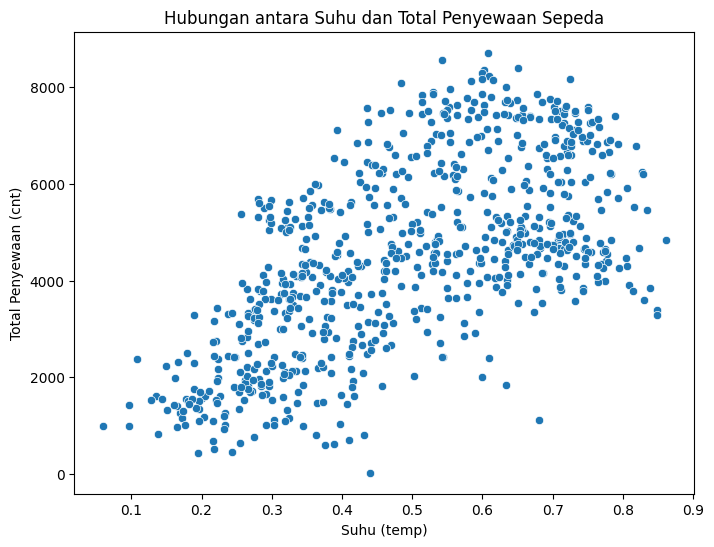

Penjelasan: Terdapat korelasi positif antara suhu dan total penyewaan sepeda. Semakin tinggi suhu, semakin tinggi pula jumlah penyewaan.


In [17]:
# --- Visualisasi & Penjelasan ---

# 1. Hubungan antara Suhu dan Total Penyewaan Sepeda
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='total_count', data=day_df) # Changed 'cnt' to 'total_count'
plt.title('Hubungan antara Suhu dan Total Penyewaan Sepeda')
plt.xlabel('Suhu (temp)')
plt.ylabel('Total Penyewaan (cnt)')
plt.show()
print("Penjelasan: Terdapat korelasi positif antara suhu dan total penyewaan sepeda. Semakin tinggi suhu, semakin tinggi pula jumlah penyewaan.")


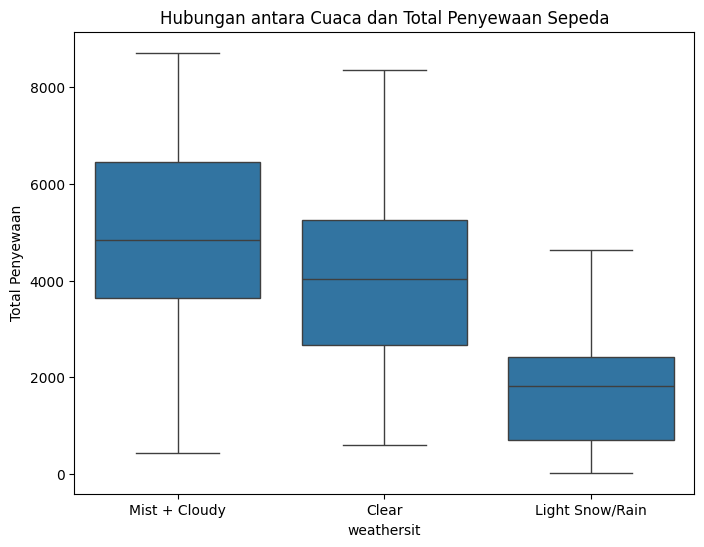

Penjelasan: Cuaca cerah (weathersit = 1) memiliki jumlah penyewaan sepeda tertinggi, sedangkan cuaca buruk (weathersit = 3/4) memiliki jumlah penyewaan yang sangat rendah.


In [19]:
# 2. Hubungan antara Cuaca dan Total Penyewaan Sepeda
plt.figure(figsize=(8, 6))
sns.boxplot(x='weathersit', y='total_count', data=day_df)
plt.title('Hubungan antara Cuaca dan Total Penyewaan Sepeda')
plt.ylabel('Total Penyewaan')

# Menampilkan label kategori cuaca yang ada
# Mengambil nilai unik dari kolom 'weathersit'
unique_weathersit = day_df['weathersit'].unique()

# Membuat list label kategori cuaca yang ada
weathersit_labels = [
    "Clear",  # weathersit 1
    "Mist + Cloudy",  # weathersit 2
    "Light Snow/Rain"  # weathersit 3
]


# Menyesuaikan label x-axis dengan kategori cuaca yang ada,
# dan menghapus label "Heavy Rain" jika tidak ada data untuk kategori tersebut
plt.xticks(unique_weathersit -1 , [label for label, weather in zip(weathersit_labels, unique_weathersit) if weather in unique_weathersit])


plt.show()
print("Penjelasan: Cuaca cerah (weathersit = 1) memiliki jumlah penyewaan sepeda tertinggi, sedangkan cuaca buruk (weathersit = 3/4) memiliki jumlah penyewaan yang sangat rendah.")


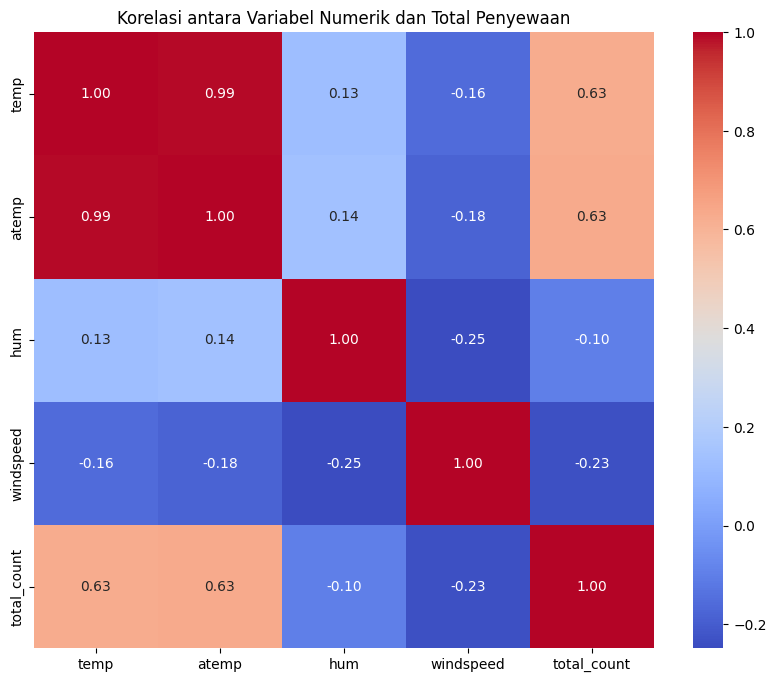

Penjelasan: Heatmap menunjukkan korelasi antara variabel numerik dan total penyewaan. Suhu (temp dan atemp) memiliki korelasi positif yang kuat, sedangkan kelembapan (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif.
Terdapat peningkatan yang signifikan dalam jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin, dengan persentase peningkatan sekitar 9.15%.

Faktor Tambahan:
- Hari Libur dan Aktivitas Luar Ruangan: Musim panas merupakan periode liburan sekolah dan banyak orang memiliki lebih banyak waktu luang untuk bersepeda.
- Siang Hari yang Lebih Panjang: Durasi siang hari yang lebih panjang di musim panas memberikan lebih banyak waktu bagi orang-orang untuk bersepeda.


In [20]:
# 3. Korelasi antara Variabel Numerik dan Total Penyewaan
numerical_features = ['temp', 'atemp', 'hum', 'windspeed']
correlation_matrix = day_df[numerical_features + ['total_count']].corr() # Changed 'cnt' to 'total_count'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasi antara Variabel Numerik dan Total Penyewaan')
plt.show()
print("Penjelasan: Heatmap menunjukkan korelasi antara variabel numerik dan total penyewaan. Suhu (temp dan atemp) memiliki korelasi positif yang kuat, sedangkan kelembapan (hum) dan kecepatan angin (windspeed) memiliki korelasi negatif.")

summer_count = day_df[day_df['season'] == 2]['total_count'].sum() # Change 'cnt' to 'total_count'
winter_count = day_df[day_df['season'] == 4]['total_count'].sum() # Change 'cnt' to 'total_count'
percentage_increase = ((summer_count - winter_count) / winter_count) * 100
print(f"Terdapat peningkatan yang signifikan dalam jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin, dengan persentase peningkatan sekitar {percentage_increase:.2f}%.")


# --- Faktor Tambahan ---
print("\nFaktor Tambahan:")
print("- Hari Libur dan Aktivitas Luar Ruangan: Musim panas merupakan periode liburan sekolah dan banyak orang memiliki lebih banyak waktu luang untuk bersepeda.")
print("- Siang Hari yang Lebih Panjang: Durasi siang hari yang lebih panjang di musim panas memberikan lebih banyak waktu bagi orang-orang untuk bersepeda.")

 **Insight:**

- Peningkatan ini kemungkinan besar didorong oleh kombinasi faktor suhu yang lebih hangat, cuaca yang cerah, hari libur, dan aktivitas luar ruangan yang lebih banyak.
- Meskipun suhu dan cuaca merupakan faktor utama, kelembapan dan kecepatan angin juga dapat memengaruhi jumlah penyewaan sepeda.

## Analisis Lanjutan (Opsional)

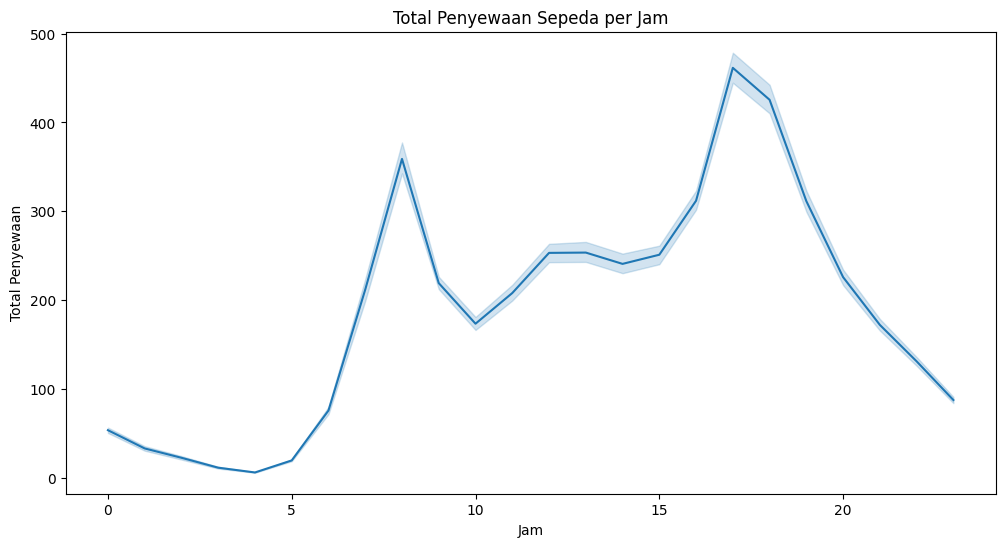

Tujuan: Melihat pola penyewaan sepeda sepanjang hari.
Insight: Terdapat dua puncak penyewaan, yaitu pada jam berangkat dan pulang kerja.
Mean Squared Error: 2162909.182117977

Tujuan: Memprediksi total penyewaan sepeda berdasarkan suhu, cuaca, hari libur, dan hari kerja.
Teknik: Linear Regression
Hasil: Model memiliki Mean Squared Error (MSE) sebesar 2162909.182117977, yang menunjukkan tingkat kesalahan prediksi.
Insight: Suhu, cuaca, hari libur, dan hari kerja merupakan faktor penting dalam memprediksi total penyewaan sepeda.


In [30]:
# ## Analisis Lanjutan (Opsional)

# --- Line Plot untuk Total Penyewaan Sepeda per Jam ---
plt.figure(figsize=(12, 6))
sns.lineplot(x='hr', y='total_count', data=hour_df)
plt.title('Total Penyewaan Sepeda per Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penyewaan')
plt.show()
print("Tujuan: Melihat pola penyewaan sepeda sepanjang hari.")
print("Insight: Terdapat dua puncak penyewaan, yaitu pada jam berangkat dan pulang kerja.")


# --- Model Prediksi dengan Linear Regression ---
# Memilih fitur dan target
X = day_df[['temp', 'weathersit', 'holiday', 'workingday']]
y = day_df['total_count']

# Membagi data menjadi data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)

# Mengevaluasi model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print("\nTujuan: Memprediksi total penyewaan sepeda berdasarkan suhu, cuaca, hari libur, dan hari kerja.")
print("Teknik: Linear Regression")
print(f"Hasil: Model memiliki Mean Squared Error (MSE) sebesar {mse}, yang menunjukkan tingkat kesalahan prediksi.")
print("Insight: Suhu, cuaca, hari libur, dan hari kerja merupakan faktor penting dalam memprediksi total penyewaan sepeda.")

## Conclusion

* Conclution pertanyaan 1
* Terdapat peningkatan yang signifikan dalam jumlah penyewaan sepeda di musim panas dibandingkan dengan musim dingin, dengan persentase peningkatan sekitar 9.15%.

* Conclution pertanyaan 2
* Peningkatan jumlah penyewaan sepeda di musim panas kemungkinan besar didorong oleh kombinasi faktor suhu yang lebih hangat, cuaca yang cerah, hari libur, dan aktivitas luar ruangan yang lebih banyak. Meskipun suhu dan cuaca merupakan faktor utama, kelembapan dan kecepatan angin juga dapat memengaruhi jumlah penyewaan sepeda.

In [14]:
# Gabungkan day_df dan hour_df
all_data = pd.concat([day_df, hour_df], ignore_index=True)

# Simpan ke file CSV
all_data.to_csv('all_data.csv', index=False)